In [831]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
from OLS import OLS
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing dataframe and splitting into X and y datasets

In [887]:
cancer_df = pd.read_csv("../data/cancer_reg_final.csv", index_col=0)
cancer_df = cancer_df.drop(columns=["studyPerCap", "BirthRate"])
X_matrix = cancer_df.drop("TARGET_deathRate", axis=1)
X_matrix = X_matrix.select_dtypes(include='number')
y = cancer_df["TARGET_deathRate"].to_numpy()

In [888]:
X_new = X_matrix

Splitting into train test

In [889]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=43)
ones_column = np.ones(len(X_train))
ones_column = ones_column.reshape((len(X_train), 1))
X_train = np.hstack((ones_column, X_train))

ones_column = np.ones(len(X_test))
ones_column = ones_column.reshape((len(X_test), 1))
X_test = np.hstack((ones_column, X_test))

In [890]:
X_train

array([[1.00000000e+00, 3.83000000e+02, 1.59000000e+02, ...,
        8.92803007e-01, 1.15655126e+00, 1.76590069e+00],
       [1.00000000e+00, 1.38000000e+02, 5.00000000e+01, ...,
        1.08310263e+00, 7.62543106e-01, 1.89421536e-01],
       [1.00000000e+00, 7.70000000e+01, 3.40000000e+01, ...,
        1.31438356e+01, 1.16438356e-01, 4.06164384e+00],
       ...,
       [1.00000000e+00, 1.03000000e+02, 5.40000000e+01, ...,
        6.95111613e-01, 2.82565700e-02, 5.31223509e-01],
       [1.00000000e+00, 4.78000000e+02, 2.03000000e+02, ...,
        1.33522786e+01, 8.13550280e-01, 1.59734904e+00],
       [1.00000000e+00, 8.60000000e+01, 3.60000000e+01, ...,
        2.02853761e+01, 1.11783272e-01, 2.49868490e-01]])

# Applying the regression

In [891]:
Regression = OLS()
Regression.fit(X_train, y_train)

In [892]:
Regression.summary()

OLS Regression Results
Name | Coeff Value | C_ste | t | p
Beta0 | 33.71607359158625 | 30.685550369858777 | 1.0987605953030009 | 0.2733648256390553
Beta1 | -0.6936972066904191 | 0.059288830077055474 | -11.700301823949752 | 0.0
Beta2 | 1.7002335978407566 | 0.13408922427210962 | 12.679867506656931 | 0.0
Beta3 | 0.30741017210403976 | 0.02797124012822186 | 10.990223196928447 | 0.0
Beta4 | 0.0001446586282327837 | 0.00031826926351546936 | 0.45451648907263276 | 0.6500140408214818
Beta5 | 1.327301400204752e-05 | 0.00021891412906054641 | 0.060631143631558485 | 0.951721375162452
Beta6 | -0.06938410293987207 | 0.6091258213407084 | -0.11390766982617008 | 0.9094400864136163
Beta7 | -0.05921593623729571 | 0.16272859464375233 | -0.36389385877099256 | 0.7163715719617567
Beta8 | 0.033219549896137957 | 0.3455153767510776 | 0.09614492474547837 | 0.9235142422551652
Beta9 | 0.19873522745020422 | 0.2958412065058711 | 0.6717631725391853 | 0.5026103195153326
Beta10 | -0.8038199978871665 | 0.5490515106651442 | 

In [893]:
print(Regression.R2)
print(Regression.adj_R2)

0.6917102953241974
0.6654356045847823


In [894]:
Reg_predicted_vals = Regression.predict(X_test)
y_pred = np.array(list(map(round, Reg_predicted_vals)))
y_real = y_test

In [895]:
y_real

array([190. , 174. , 189.8, 180.7, 167.2, 181.4, 169.8, 177. , 191. ,
       174.4, 207. , 167.7, 191.2, 215.4, 190.2, 201.9, 185.1, 159.5,
       168.8, 194. , 189.7, 197.2, 161.3, 183.2, 174.7, 165.8, 189.8,
       197.9, 172.1, 219.1, 185.9, 192.8, 151.4, 165.2, 191.5, 232.1,
       201.7, 217.2, 176. , 136.4, 180.2, 213.2, 180. , 187.7, 172.5,
       188.4, 197.7, 191.7, 202.2])

In [896]:
test_df = pd.DataFrame(X_test)
test_df.columns = ["intercept"] + X_new.columns.to_list()

test_df["PREDICTED_deathRate"] = pd.Series(y_pred)
test_df["TARGET_deathRate"] = pd.Series(y_test)

In [897]:
test_df

,intercept,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,PctNoHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctBlack,PctAsian,PctOtherRace,PREDICTED_deathRate,TARGET_deathRate
0,1.0,97.0,37.0,521.0,45709.0,13428.0,13.6,17.7,11.5,38.6,11.1,6.7,0.544839,0.161979,0.000000,200,190.0
1,1.0,155.0,65.0,434.3,45158.0,26224.0,13.1,17.9,7.4,42.2,9.0,7.1,2.347701,0.441609,0.362346,183,174.0
2,1.0,191.0,81.0,460.0,37707.0,30168.0,20.2,29.2,3.2,34.5,7.4,9.9,3.850331,0.283016,0.069109,194,189.8
3,1.0,94.0,40.0,426.9,35078.0,18963.0,26.7,26.1,3.6,38.0,7.2,13.8,11.430675,0.741364,1.077869,186,180.7
4,1.0,134.0,53.0,420.3,47964.0,18409.0,14.0,10.0,0.0,23.9,13.3,15.2,0.653802,0.938522,1.471053,173,167.2
5,1.0,35.0,16.0,447.0,56270.0,5448.0,8.4,20.1,8.6,36.4,14.6,2.0,0.586833,0.293416,0.000000,178,181.4
6,1.0,183.0,73.0,435.3,41420.0,33940.0,17.6,18.0,5.9,46.4,9.0,7.0,3.972315,0.156763,0.328315,178,169.8
7,1.0,134.0,62.0,402.9,35968.0,20937.0,21.4,28.6,4.7,40.9,7.5,12.4,0.310998,0.560739,0.259165,186,177.0
8,1.0,183.0,77.0,456.9,60121.0,34602.0,11.5,14.8,2.7,37.0,13.0,8.1,16.674513,0.517860,1.894898,193,191.0
9,1.0,242.0,108.0,399.9,46427.0,53070.0,16.6,23.8,2.3,33.7,9.9,4.9,17.522495,0.559328,1.062536,184,174.4


# Calculating the correlation

In [898]:
y_pred_mean = test_df["PREDICTED_deathRate"].mean()
y_real_mean = test_df["TARGET_deathRate"].mean()

corr_coeff = sum((x_i - y_pred_mean) * (y_i - y_real_mean) for x_i, y_i in zip(y_pred, y_real)) / ((sum((y_pred - y_pred_mean)**2) * sum((y_real-y_real_mean)**2))**0.5)

# Plotting y_pred x y_real

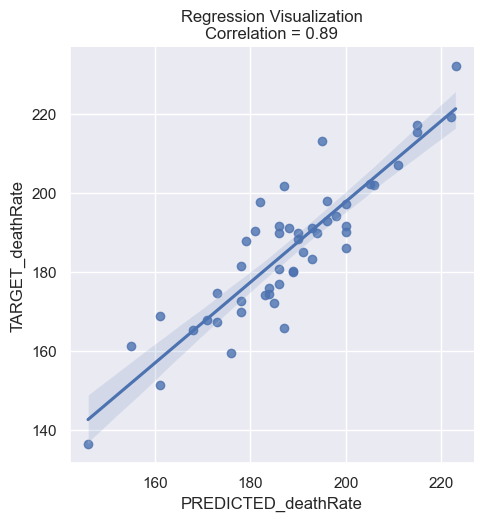

In [899]:
sns.set_theme()

g = sns.lmplot(
    data=test_df,
    x="PREDICTED_deathRate", y="TARGET_deathRate",
    height=5
)

g.set_axis_labels("PREDICTED_deathRate", "TARGET_deathRate")
g.set(title=f"Regression Visualization\nCorrelation = {round(corr_coeff, 2)}")


# Final results

In [902]:
print(f"Regression Coefficients: = {Regression.coefficients}")
print(f"Adj R squared value: = {Regression.adj_R2}")
print(f"RMSE = {(sum((y_pred-y_real)**2)/len(y_pred))**0.5}")

Regression Coefficients: = [ 3.37160736e+01 -6.93697207e-01  1.70023360e+00  3.07410172e-01
  1.44658628e-04  1.32730140e-05 -6.93841029e-02 -5.92159362e-02
  3.32195499e-02  1.98735227e-01 -8.03819998e-01  9.73851723e-01
  2.46358648e-01 -1.19534871e+00 -7.02605289e-01]
Adj R squared value: = 0.6654356045847823
RMSE = 8.516526550759757
